In [13]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

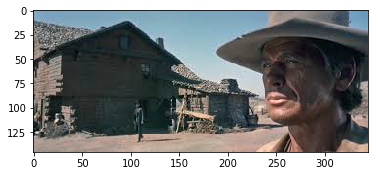

In [14]:
image = mpimg.imread('Image.jpg')
plt.imshow(image)